<a href="https://colab.research.google.com/github/PedrinHm/Labs_Machine_Learning/blob/main/lab_do_pedrin_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Projeto Prático - Regressão Linear (AirBnb)**


---


<br>
UNIRV - UNIVERSIDADE DE RIO VERDE<br>
Faculdade de Engenharia de Software<br><br>


**Aluno: Pedro Henrique Mendes**<br>
pedro.h.mendes@academico.unirv.edu.br<br>
**Prof. Me. Sandro Silva Moreira**<br>
sandro.moreira@unirv.edu.br<br><br>


---



In [218]:
%tensorflow_version 2.x
import tensorflow as tf
print("You are using TensorFlow version", tf.__version__)
if len(tf.config.list_physical_devices('GPU')) > 0:
  print("You have a GPU enabled.")
else:
  print("Enable a GPU before running this notebook.")

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
You are using TensorFlow version 2.15.0
Enable a GPU before running this notebook.


In [ ]:
pip install category_encoders

In [220]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from category_encoders.one_hot import OneHotEncoder, OrdinalEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.regularizers import l1, l2, l1_l2
from keras.callbacks import EarlyStopping

In [221]:
# Carregando o arquivo CSV.

url = "http://data.insideairbnb.com/united-states/ny/new-york-city/2024-02-06/data/listings.csv.gz"

dataset = pd.read_csv(url)

In [222]:
# selecionando um subconjunto específico de colunas.

dataset = dataset[["neighbourhood_cleansed", "property_type", "room_type", "accommodates", "bathrooms", "bedrooms", "beds", "price"]]

In [ ]:
# fornece informações detalhadas sobre o DataFrame.

dataset.info(verbose=True)

In [ ]:
# Verificando tipos 'objetos'.

dataset.select_dtypes(include='object').describe()

In [ ]:
# Verificando tipos 'float'.

dataset.select_dtypes(include='float').describe()

In [ ]:
# Verificando tipos 'int'.

dataset.select_dtypes(include='int').describe()

In [ ]:
# dropando valores NaN.

dataset = dataset.dropna()

# Convertendo tipo obj em string.

dataset[['neighbourhood_cleansed','property_type','room_type',]] = dataset[['neighbourhood_cleansed','property_type','room_type',]].astype('string')

# Convertendo 'price' para float e removendo o $.

dataset['price'] = dataset['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Normalizando as categoricas.

le = LabelEncoder()

# Selecionando as colunas categoricas.

dataset_categoricas = dataset[['neighbourhood_cleansed', 'property_type', 'room_type']]

for col in dataset_categoricas.columns:
    # Atribuindo os valores usando o .loc para modificar o DataFrame original.
    dataset_categoricas.loc[:, col] = le.fit_transform(dataset_categoricas[col])

# Normalizando as numericas.

scaler = StandardScaler()

# Selecionando as colunas numéricas.

dataset_numericas = dataset[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price']]

dataset = pd.concat([dataset_numericas, dataset_categoricas], axis=1)

# Ajustando o scaler às colunas numéricas.

dataset = scaler.fit_transform(dataset)

In [227]:
# Convertendo o array NumPy para DataFrame com os nomes das colunas.

col = ['neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price']

dataset = pd.DataFrame(dataset, columns=col)

In [ ]:
print(dataset)

In [229]:
X = dataset.drop(columns=['price'])
y = dataset['price']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [230]:
# Criando a regularização L1
regularizer_l1 = l1(l=0.01)

# Criando a regularização L2
regularizer_l2 = l2(l=0.012)

# Combinando as duas
regularizer_combined = l1_l2(l1=0.01, l2=0.01)

In [243]:
##Criando arquitetura do modelo

model = Sequential()
model.add(Dense(32, activation='relu', kernel_regularizer=regularizer_l2, input_shape=X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [ ]:
model.summary()

In [245]:
##compilando modelo

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_absolute_error'])

In [246]:
##Treinando modelo (completar)

history = model.fit(X_train, y_train,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
452/452 [==============================] - 2s 3ms/step - loss: 0.4367 - mean_absolute_error: 0.3621 - val_loss: 0.3168 - val_mean_absolute_error: 0.2497
Epoch 2/30
452/452 [==============================] - 1s 2ms/step - loss: 0.3042 - mean_absolute_error: 0.2806 - val_loss: 0.2186 - val_mean_absolute_error: 0.1914
Epoch 3/30
452/452 [==============================] - 1s 2ms/step - loss: 0.2650 - mean_absolute_error: 0.2427 - val_loss: 0.1493 - val_mean_absolute_error: 0.1667
Epoch 4/30
452/452 [==============================] - 1s 2ms/step - loss: 0.1566 - mean_absolute_error: 0.1937 - val_loss: 0.1262 - val_mean_absolute_error: 0.1565
Epoch 5/30
452/452 [==============================] - 1s 2ms/step - loss: 0.1324 - mean_absolute_error: 0.1744 - val_loss: 0.1078 - val_mean_absolute_error: 0.1378
Epoch 6/30
452/452 [==============================] - 1s 2ms/step - loss: 0.1129 - mean_absolute_error: 0.1606 - val_loss: 0.0931 - val_mean_absolute_error: 0.1245
Epoch 7/30
452/4

**Avaliando Resultados**

In [247]:
X_new = X_test[:3]

y_pred = model.predict(X_new)

print(y_pred)

1/1 [==============================] - 0s 59ms/step
[[-0.8654484]
 [ 1.096221 ]
 [-0.8726712]]


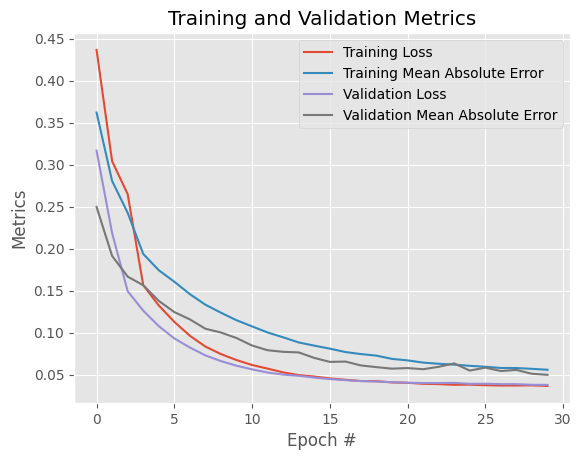

In [248]:
num_epochs = 30

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), history.history["loss"], label="Training Loss")
plt.plot(np.arange(0, num_epochs), history.history["mean_absolute_error"], label="Training Mean Absolute Error")
plt.plot(np.arange(0, num_epochs), history.history["val_loss"], label="Validation Loss")
plt.plot(np.arange(0, num_epochs), history.history["val_mean_absolute_error"], label="Validation Mean Absolute Error")
plt.title("Training and Validation Metrics")
plt.xlabel("Epoch #")
plt.ylabel("Metrics")
plt.legend()
plt.show()


In [ ]:
mse_test = model.evaluate(X_test,y_test)

151/151 [==============================] - 0s 2ms/step - loss: 0.0649 - mean_absolute_error: 0.1384


In [250]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")



Saved model to disk


In [252]:
from keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk
